#Assignment Python
#Course instructor : Muhammad Sohaib 
#Ali Ejaz - 1749

In [7]:
##Ques1 : Load the dataset to pandas dataframe and print names of columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use('ggplot')
#import data set
dataSt = pd.read_csv(r'D:\chronic_kidney_disease_updated.csv')

#create copy of dataframe
dataStFrm = dataSt.copy()

print(dataStFrm.columns)



Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'Class'],
      dtype='object')


In [6]:
##Ques2. Display first 5 rows in the dataset.
dataStFrm[0:5]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
2,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
3,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd


In [10]:
##Ques 3. Check if dataset is in cleaned form else clean it. Check Diabetes Mellitus(dm) variable and print what type of values it has.
dataStFrm['dm'].unique()

array([nan, 'yes', 'no', ' yes', '\tno', '\tyes'], dtype=object)

In [11]:
##Ques 4. The dataset is not in clean form. Write a function that takes pandas dataframe as an input, remove these characters i-e ( "\t", " ") from the string value and replace with "nan" if the string value has only unicode characters i-e ("?"). The function should apply this transformation to all columns in dataframe and for cross check display unique values of Diabetes Mellitus(dm).
def CleanData(arry, dataStFrm):
    for i in arry:
        dataStFrm.replace(to_replace=i, value=np.nan, inplace=True)

CleanData(( "\t", " ", "?"), dataStFrm)

print(dataStFrm)

     age   bp     sg   al   su       rbc        pc         pcc          ba  \
0    NaN  NaN    NaN  NaN  NaN       NaN       NaN         NaN         NaN   
1     48   80   1.02    1    0       NaN    normal  notpresent  notpresent   
2      7   50   1.02    4    0       NaN    normal  notpresent  notpresent   
3     62   80   1.01    2    3    normal    normal  notpresent  notpresent   
4     48   70  1.005    4    0    normal  abnormal     present  notpresent   
5     51   80   1.01    2    0    normal    normal  notpresent  notpresent   
6     60   90  1.015    3    0       NaN       NaN  notpresent  notpresent   
7     68   70   1.01    0    0       NaN    normal  notpresent  notpresent   
8     24  NaN  1.015    2    4    normal  abnormal  notpresent  notpresent   
9     52  100  1.015    3    0    normal  abnormal     present  notpresent   
10    53   90   1.02    2    0  abnormal  abnormal     present  notpresent   
11    50   60   1.01    2    4       NaN  abnormal     present  

In [13]:
##Ques 5. Change datatype to Numerical of following columns in Dataframe. columns = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
df = pd.DataFrame(dataStFrm, columns=['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc'])
df[['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']] = df[['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']].apply(pd.to_numeric)

ValueError: ('Unable to parse string "\t?" at position 67', 'occurred at index pcv')

In [14]:
df.apply(lambda l: pd.to_numeric(l, errors='coerce'))

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
2,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
3,62.0,80.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
4,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
5,51.0,80.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
6,60.0,90.0,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,4.4
7,68.0,70.0,100.0,54.0,24.0,104.0,4.0,12.4,36.0,NaN,NaN
8,24.0,NaN,410.0,31.0,1.1,NaN,NaN,12.4,44.0,6900.0,5.0
9,52.0,100.0,138.0,60.0,1.9,NaN,NaN,10.8,33.0,9600.0,4.0


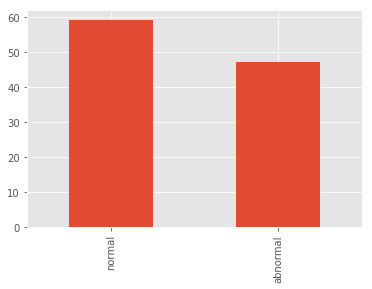

In [15]:
##Ques 6. Count the number of normal or abnormal red blood cells people having Chronic Kidney Disease(CKD).
ckd=dataStFrm[dataStFrm.Class=='ckd']
ckd['rbc'].value_counts().plot(kind='bar')
plt.show()

In [21]:
##Ques 7. Display maximum blood pressure having Chronic Kidney Disease(CKD).
type(dataStFrm['bp'])
dataStFrm['bp']

0        0
1       80
2       50
3       80
4       70
5       80
6       90
7       70
8        0
9      100
10      90
11      60
12      70
13      70
14      70
15      80
16      80
17      70
18      80
19     100
20      60
21      80
22      90
23      80
24      70
25     100
26      60
27      80
28      70
29      70
      ... 
371     70
372     60
373     60
374     70
375     80
376     80
377     70
378     70
379     60
380     80
381     60
382     70
383     80
384     80
385     60
386     70
387     70
388     80
389     80
390     80
391     80
392     80
393     80
394     60
395     80
396     80
397     70
398     80
399     60
400     80
Name: bp, dtype: object

In [22]:
dataStFrm['bp'] = dataStFrm['bp'].astype(int).astype('str')
dataStFrm.fillna(0,inplace=True)
print(dataStFrm['bp'].max())

90


In [23]:
##Ques 8. Create a csv file of cleaned data in dataframe with name "clean_chronic_kidney_disease.csv"
dataStFrm.to_csv(path_or_buf="D:/clean_chronic_kidney_disease.csv")